## 頂点ラベル付きグラフの描画とファイル出力

In [14]:
import colorsys
import random
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import colorsys
import random
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


from matplotlib.backends.backend_pdf import PdfPages



from matplotlib.backends.backend_pdf import PdfPages

# 配列を初期化
color_array = []
edge_colors = []

# 頂点ラベル数
sigma = 2
edgeLabelNum  = 2

# CSS4_COLORS の色をリストに変換
colors = list(mcolors.CSS4_COLORS.values())

# 色を均等に選ぶためのインターバルを計算
interval = len(colors) // sigma

# インターバルに従って均等に色を選択
for i in range(sigma):
    color_array.append(colors[i * interval])

# 色を均等に選ぶためのインターバルを計算
interval = len(colors) // edgeLabelNum

# インターバルに従って均等に色を選択
for i in range(edgeLabelNum):
    edge_colors.append(colors[i * interval])
    
# # 指定したサイズの色情報を生成
# for _ in range(sigma):
#     # ランダムな色情報を生成
#     random_color = random.choice(list(mcolors.CSS4_COLORS.values()))
#     color_array.append(random_color)

# 生成した色情報を表示
print("Color Array:", color_array)
print("Edge Array:", edge_colors)


Color Array: ['#F0F8FF', '#FFB6C1']
Edge Array: ['#F0F8FF', '#FFB6C1']


1
1
0


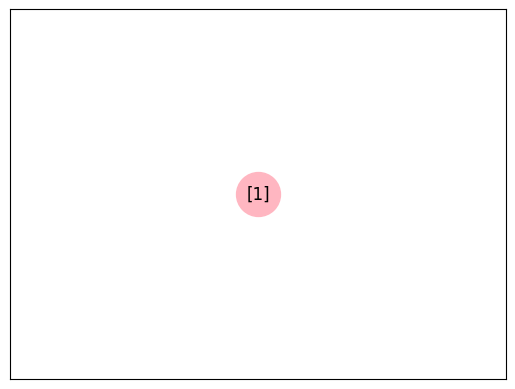

2
1
1
1
0 1 2


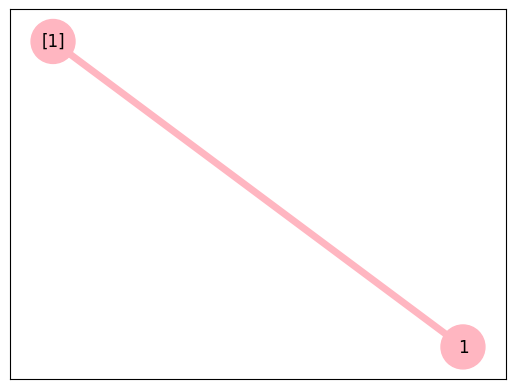

2
1
1
1
0 1 1


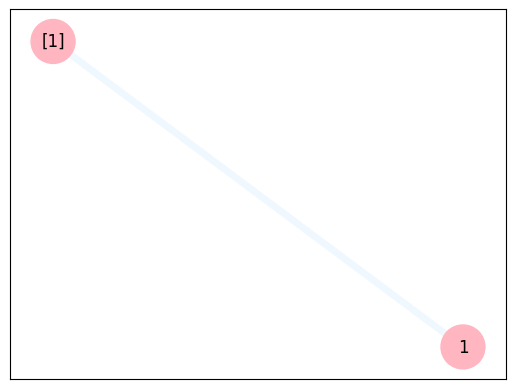

2
1
0
1
0 1 2


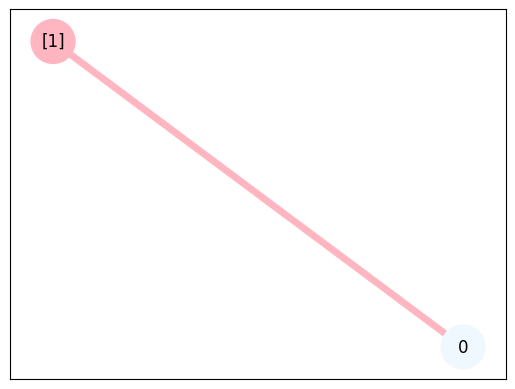

2
1
0
1
0 1 1


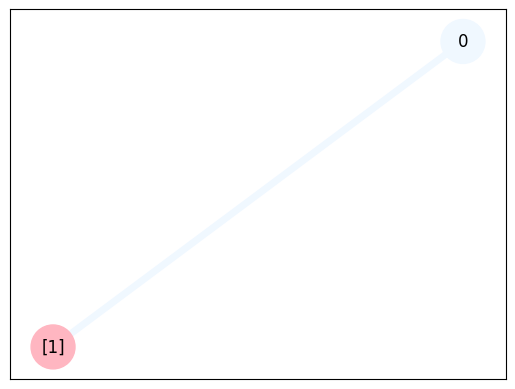

1
0
0


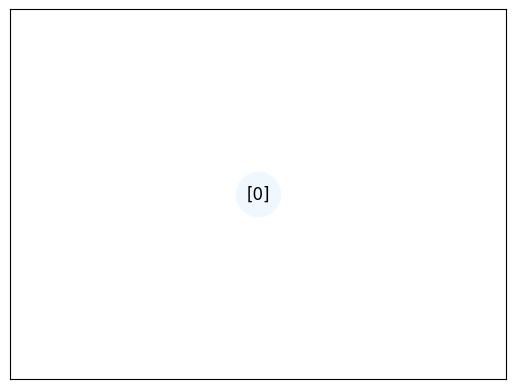

2
0
0
1
0 1 2


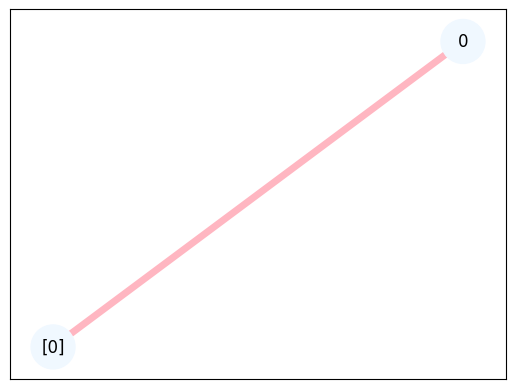

2
0
0
1
0 1 1


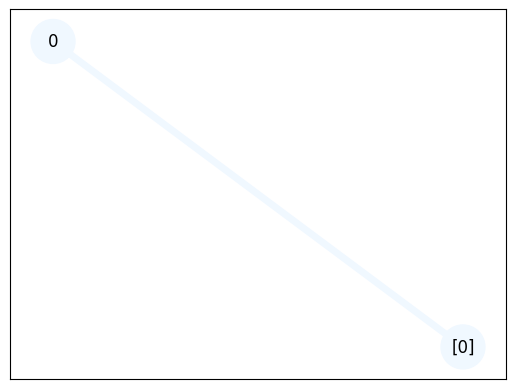

In [15]:
pdf = PdfPages("output.pdf")

# ファイルを読み込む
with open("output.gfu", "r") as f:
    data = f.readlines()
    
data_len = len(data)

now = 0

while True:
# 頂点数を取得   
    now +=1
    labels = None
    n = int(data[now])
    print(n)
    
    # 頂点IDを取得
    nodes = [int(x) for x in data[now+1:now+1+n]]

    # グラフを初期化
    G = nx.Graph()
    
    id = 0
    countlabels = set()
    max_label = 0

    # 頂点をグラフに追加
    for node in nodes:
        print(node)
        # G.nodes[id] = node
        G.add_node(id)
        
        if id==0:
            labels = {id: [node]}
        else:
            labels[id] = node
        id+=1

        # countlabels.add(node)
        if max_label < node:
            max_label = node
    
    
    # 辺の数を取得
    m = int(data[now+n+1])
    edge_labels = []
    edge_data = []
    print(m)
    # 辺をグラフに追加
    for line in data[now+n+2:now+n+2+m]:
        u, v,w = map(int, line.split())
        G.add_edge(u, v)
        edge_labels.append(w)
        edge_data.append((u, v, w))
        print(u,v,w)
        
    now+=n+2+m
    
    fig, ax = plt.subplots()  # 図のサイズを調整


  # force-directed layoutアルゴリズムを使用してノードの位置を計算
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos,node_size=1000,node_color=[color_array[node] for node in nodes])
    
    # 辺を描画（ラベルごとに異なる色を使用）
    for u,v,w in  edge_data:
        color = edge_colors[w-1]  # ラベルに基づいて色を選ぶ
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=color, width=5)
        
    # nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos, labels, font_size=12,font_color='black')
    
    plt.show()
    
    plt.close()   # Figureオブジェクトを閉じる
    pdf.savefig(fig)
        
    if now>=data_len:
        break
    
pdf.close()
